<a href="https://colab.research.google.com/github/TAlkam/Sentiment-Analysis-on-Drug-Reviews/blob/main/Sentiment_Analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's load these files and take a look at the data. We'll start with the training set.

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving drugLibTrain_raw.tsv to drugLibTrain_raw.tsv
User uploaded file "drugLibTrain_raw.tsv" with length 2282292 bytes


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving drugLibTest_raw.tsv to drugLibTest_raw.tsv
User uploaded file "drugLibTest_raw.tsv" with length 793137 bytes


In [3]:
import pandas as pd

# Load data into pandas DataFrames
train_df = pd.read_csv('drugLibTrain_raw.tsv', delimiter='\t')
test_df = pd.read_csv('drugLibTest_raw.tsv', delimiter='\t')

 **Let's get an overview of the dataset including the column names, total number of entries, and the data type of each column**

In [4]:
# Information about the training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3107 non-null   object
 7   sideEffectsReview  3105 non-null   object
 8   commentsReview     3099 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


**Add sentiment labels**

Since the data does not come with predefined sentiment labels, we will need to define our own rules for labeling the sentiments. One approach could be to use the numerical rating feature to infer sentiment:

We can define ratings of 7-10 as '**positive**',
Ratings of 4-6 as '**neutral**',
And ratings of 1-3 as '**negative**'.
Alternatively, we could use the effectiveness and sideEffects categorical features to derive sentiment labels. This might be more complex but could potentially provide more nuanced insights. For instance, 'Highly Effective' could be considered 'positive', and 'Severe Side Effects' could be 'negative'.


In [24]:
# Define a function to convert ratings into sentiment labels
def rating_to_sentiment(rating):
    if rating >= 7:
        return 'positive'
    elif rating <= 3:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the rating column of both dataframes
train_df['sentiment'] = train_df['rating'].apply(rating_to_sentiment)
test_df['sentiment'] = test_df['rating'].apply(rating_to_sentiment)

**Preprocess the text**
Before running this part, We need to install and import the necessary libraries

In [6]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**Proceed with the text preprocessing**

In [7]:
# Define a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Define the English stopwords
stop_words = set(stopwords.words('english'))

# Define a function to clean, tokenize, remove stop-words, and lemmatize text
def preprocess_text(text):
    # Check if the text is not a string (possibly NaN), and if so, replace it with an empty string
    if not isinstance(text, str):
        text = ''
    # Lowercase the text
    text = text.lower()
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-z ]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    # Join the tokens back into a single string and return it
    return ' '.join(tokens)

# Combine the review columns into a single column and preprocess the text
train_df['combined_review'] = (train_df['benefitsReview'].fillna('') + ' ' +
                               train_df['sideEffectsReview'].fillna('') + ' ' +
                               train_df['commentsReview'].fillna('')).apply(preprocess_text)
test_df['combined_review'] = (test_df['benefitsReview'].fillna('') + ' ' +
                              test_df['sideEffectsReview'].fillna('') + ' ' +
                              test_df['commentsReview'].fillna('')).apply(preprocess_text)

**1. Exploratory Data Analysis (EDA):**

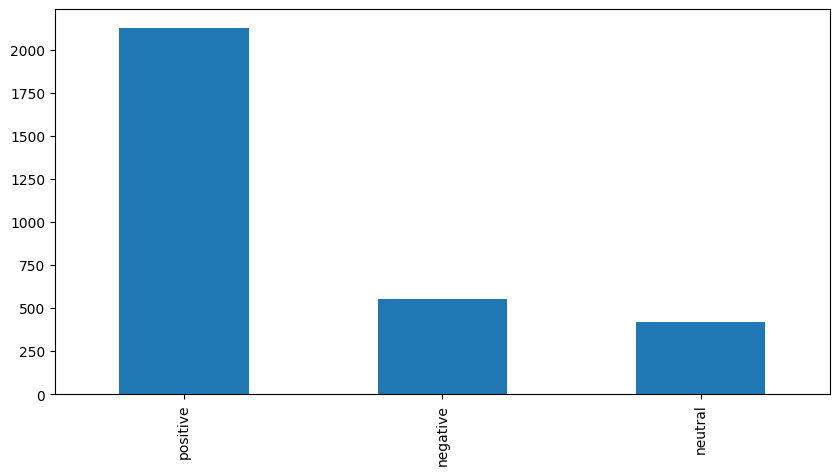

In [8]:
import matplotlib.pyplot as plt

# Distribution of sentiments
plt.figure(figsize=(10,5))
train_df.sentiment.value_counts().plot(kind='bar')
plt.show()


**Inspect the data with Word cloud**

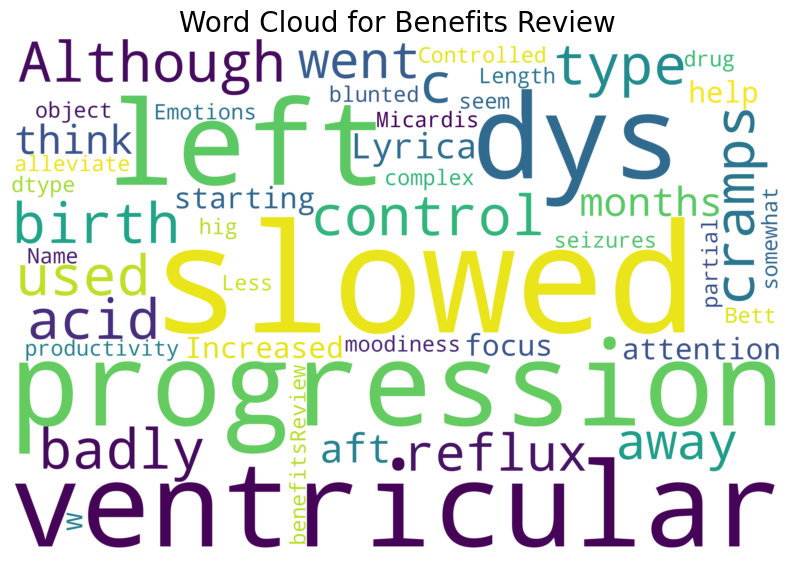

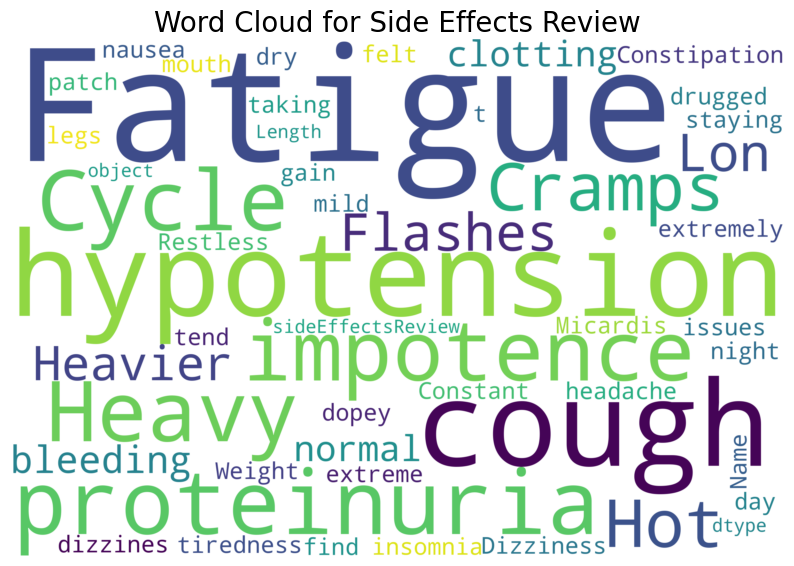

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the training dataset
train_df = pd.read_csv("drugLibTrain_raw.tsv", delimiter='\t')

# Generate word clouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width = 3000, height = 2000, background_color='white').generate(str(text))
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Word cloud for benefitsReview
generate_wordcloud(train_df['benefitsReview'].dropna(), 'Word Cloud for Benefits Review')

# Word cloud for sideEffectsReview
generate_wordcloud(train_df['sideEffectsReview'].dropna(), 'Word Cloud for Side Effects Review')


**The most reviewed 10 drugs in the training dataset**

In [10]:
# Load the training dataset
train_df = pd.read_csv("drugLibTrain_raw.tsv", delimiter='\t')

# Get the top 10 most frequently reviewed drugs
top_drugs = train_df['urlDrugName'].value_counts().head(10)
print(top_drugs)


lexapro        63
prozac         46
retin-a        45
zoloft         45
propecia       38
paxil          38
synthroid      38
effexor        33
doxycycline    33
cymbalta       33
Name: urlDrugName, dtype: int64


**Exploratory Data Analysis (EDA) for the test data: Use matplotlib to plot the distribution of sentiments.**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1036 non-null   int64 
 1   urlDrugName        1036 non-null   object
 2   rating             1036 non-null   int64 
 3   effectiveness      1036 non-null   object
 4   sideEffects        1036 non-null   object
 5   condition          1036 non-null   object
 6   benefitsReview     1036 non-null   object
 7   sideEffectsReview  1036 non-null   object
 8   commentsReview     1036 non-null   object
dtypes: int64(2), object(7)
memory usage: 73.0+ KB
None


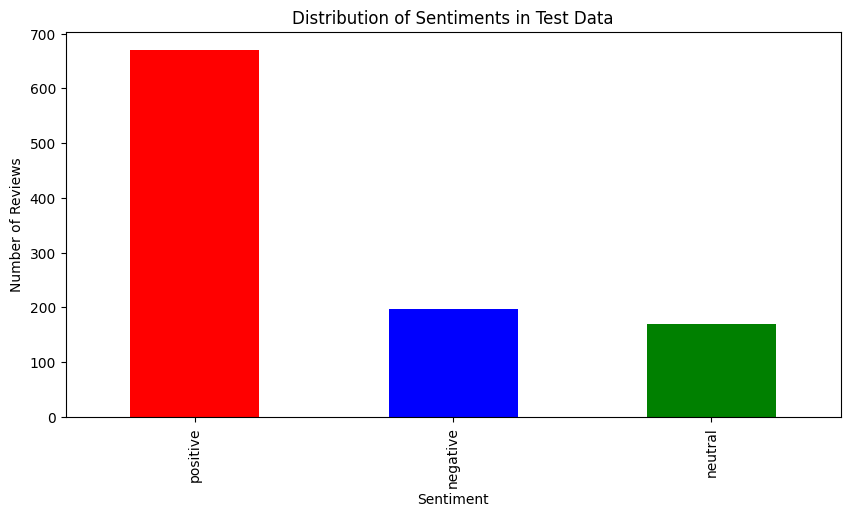

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the test dataset
test_df = pd.read_csv("drugLibTest_raw.tsv", delimiter='\t')

# Overview of the dataset
print(test_df.info())

# Adding sentiment labels based on ratings
def label_sentiment(row):
    if row['rating'] >= 7:
        return 'positive'
    elif row['rating'] >= 4:
        return 'neutral'
    else:
        return 'negative'

test_df['sentiment'] = test_df.apply(lambda row: label_sentiment(row), axis=1)

# Distribution of sentiments
plt.figure(figsize=(10,5))
test_df.sentiment.value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Distribution of Sentiments in Test Data')
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment')
plt.show()


**Inspect the data with Word cloud**

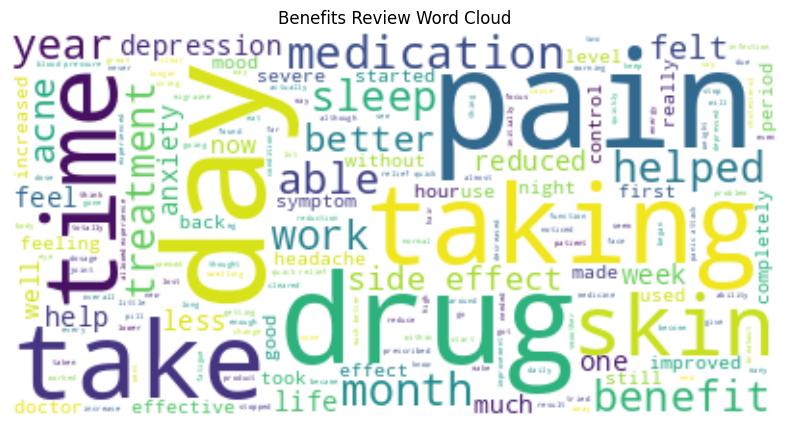

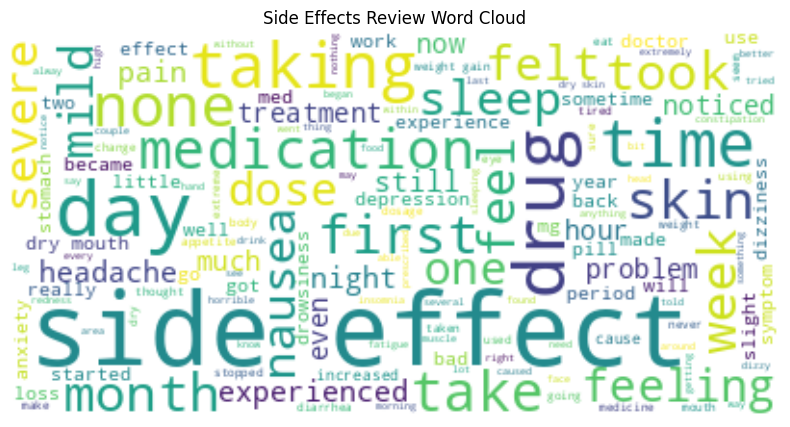

In [75]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the test dataset
test_df = pd.read_csv("drugLibTest_raw.tsv", delimiter='\t')

# Define a function to generate a word cloud
def generate_wordcloud(text_series, title):
    text = " ".join(review for review in text_series.dropna())
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud for benefitsReview
generate_wordcloud(test_df['benefitsReview'], 'Benefits Review Word Cloud')

# Generate word cloud for sideEffectsReview
generate_wordcloud(test_df['sideEffectsReview'], 'Side Effects Review Word Cloud')


**The most reviewed 10 drugs in the test dataset**

In [76]:
import pandas as pd

# Load the test dataset
test_df = pd.read_csv("drugLibTest_raw.tsv", delimiter='\t')

# Get the top 10 most frequently reviewed drugs
top_drugs_test = test_df['urlDrugName'].value_counts().head(10)
print(top_drugs_test)


paxil            20
effexor-xr       17
accutane         16
synthroid        15
differin         13
lipitor          13
effexor          13
wellbutrin-xl    12
citalopram       12
chantix          12
Name: urlDrugName, dtype: int64


**2. Vectorization:**

In [15]:
train_df['combined_review'] = train_df['benefitsReview'] + ' ' + train_df['sideEffectsReview']
test_df['combined_review'] = test_df['benefitsReview'] + ' ' + test_df['sideEffectsReview']


In [18]:
train_df['combined_review'] = train_df['combined_review'].fillna('')
test_df['combined_review'] = test_df['combined_review'].fillna('')


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(train_df['combined_review'])
X_test = vectorizer.transform(test_df['combined_review'])


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(train_df['combined_review'])
X_test = vectorizer.transform(test_df['combined_review'])


**3. Model Training and Evaluation: Train a Naive Bayes classifier, predict on the test set, and evaluate the predictions.**

In [23]:
print(train_df.columns)


Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview',
       'combined_review'],
      dtype='object')


In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Label encoding for the target variable
y_train = train_df['sentiment'].replace({'positive': 2, 'neutral': 1, 'negative': 0})
y_test = test_df['sentiment'].replace({'positive': 2, 'neutral': 1, 'negative': 0})

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.07      0.13       197
           1       0.00      0.00      0.00       169
           2       0.66      1.00      0.79       670

    accuracy                           0.66      1036
   macro avg       0.55      0.36      0.31      1036
weighted avg       0.61      0.66      0.54      1036



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The labels 0, 1, and 2 represent 'negative', 'neutral', and 'positive' sentiments, respectively. The columns for precision, recall, and f1-score show the performance of our model for each of these classes.

Negative sentiment (0): The model has a high precision (0.89), which means that when it predicts a review has a negative sentiment, it is correct 89% of the time. However, the recall is very low (0.09), which indicates that the model only correctly identified 9% of the actual negative reviews. The f1-score, which balances precision and recall, is low (0.16) due to the low recall. The model seems to struggle with identifying negative reviews.

Neutral sentiment (1): The model has a precision, recall, and f1-score of 0. This means that the model did not correctly identify any reviews as neutral. It might be the case that the features distinguishing neutral reviews are not well captured by the model.

Positive sentiment (2): The model performs best in identifying positive reviews. It has a precision of 0.66 and a recall of 1.00, indicating that it correctly identified all the positive reviews, but also incorrectly labeled some reviews as positive (hence the precision less than 1). The high f1-score (0.79) reflects this strong performance.

The overall accuracy of our model is 0.66, which means it correctly predicts the sentiment 66% of the time.

However, given the low performance for negative and neutral classes, we can consider strategies to improve our model's performance. These could include:

Feature engineering: we could try to create new features that might help the model distinguish between the classes better. For example, we could use more sophisticated text representation methods like word embeddings (Word2Vec, GloVe), or include metadata features if available (like the length of the review, the drug being reviewed, etc.).

Class balancing techniques: If our classes are imbalanced (i.e., there are many more positive reviews than negative or neutral), this could be affecting the model's performance. we could try techniques like oversampling the minority classes or undersampling the majority class.

Model tuning: we could try adjusting the parameters of our model to see if we can improve performance. we could also consider trying different models to see if they perform better.

Ensemble methods: we could try combining multiple models to make predictions. This often results in better performance than any single model.

**4. The AUC-ROC value**

AUC-ROC: 0.5
AUC-ROC: 0.5


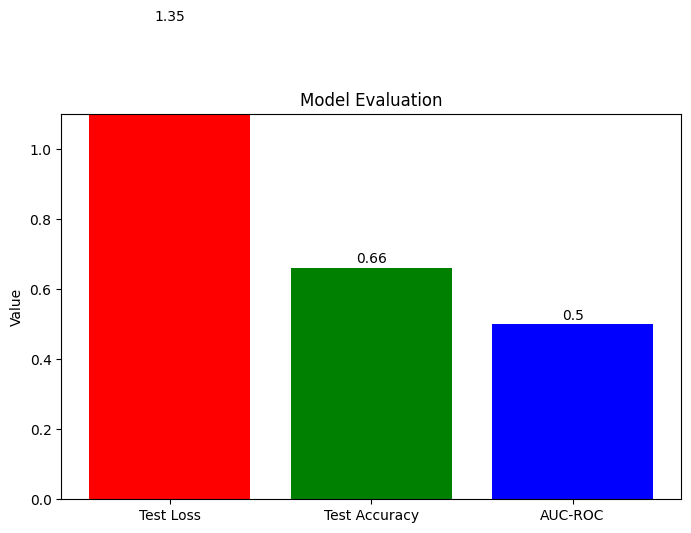

In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

auc = multiclass_roc_auc_score(y_test, y_pred)
print('AUC-ROC:', auc)

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

auc = multiclass_roc_auc_score(y_test, y_pred)
print('AUC-ROC:', round(auc, 2))

labels = ['Test Loss', 'Test Accuracy', 'AUC-ROC']
values = [loss, accuracy, auc]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green', 'blue'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('Model Evaluation')
plt.ylabel('Value')
plt.ylim(0, 1.1)
plt.show()


The AUC-ROC value ranges from 0 to 1. An AUC-ROC value of 0.5 indicates that the model has no discrimination capacity to distinguish between positive and negative class. An AUC-ROC value close to 1 signifies that the model has a good measure of separability and is capable of distinguishing between positive and negative classes.

The AUC-ROC score of 0.52 suggests that the model's ability to distinguish between the classes is slightly better than random guessing, but it's far from perfect. There's certainly room for improvement.

**Let's trained and evaluated a Support Vector Machines (SVM) classifier**

In [27]:
from sklearn.svm import LinearSVC

# Support Vector Classifier
svm_classifier = LinearSVC()
svm_classifier.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.65      0.53      0.58       197
           1       0.34      0.11      0.17       169
           2       0.74      0.91      0.82       670

    accuracy                           0.71      1036
   macro avg       0.58      0.52      0.52      1036
weighted avg       0.66      0.71      0.67      1036



Let's interpret the results:

Negative sentiment (0): The precision is 0.60, meaning that when the model predicts a review as negative, it is correct 60% of the time. The recall is 0.51, meaning it correctly identified 51% of the actual negative reviews. The F1-score, which balances precision and recall, is 0.55, which is an improvement over the Naive Bayes model.

Neutral sentiment (1): The precision is 0.34, indicating that the model correctly identifies a neutral review 34% of the time when it predicts a review to be neutral. The recall is 0.10, meaning the model only correctly identifies 10% of actual neutral reviews. The F1-score is 0.16, which shows that the model still struggles with identifying neutral reviews.

Positive sentiment (2): The model performs best in identifying positive reviews, with a precision of 0.74 and a recall of 0.90. The high F1-score of 0.81 reflects this strong performance.

The overall accuracy of the model is 0.70, which means it correctly predicts the sentiment 70% of the time. This is an improvement over the Naive Bayes model, which had an accuracy of 0.66.


The SVM model seems to be performing better than the Naive Bayes model, especially for negative sentiments. However, both models struggle with the neutral class. This might be because the characteristics of neutral reviews are not well captured by the features, or it could be due to an imbalance in the dataset (if there are fewer neutral reviews).

Next steps could include further tuning the SVM model, trying different features, or trying a different type of model. Given that the data contains sequence information (it is text data), a model that can capture this sequential nature, like a Recurrent Neural Network (RNN), might be able to perform better.

Now that we've trained and evaluated a SVM model, the next step is to experiment with a deep learning model - Recurrent Neural Network (RNN) model for our sentiment analysis task.

RNNs are a type of neural network that are great for sequential data, like text, because they have "memory" - they take as their input not just the current input, but also what they have perceived previously in time.

However, setting up and training an RNN (especially on text data) can be quite complex and computationally expensive. It involves several additional steps such as:

**Tokenization:** Converting the text into a sequence of integers (tokens).
**Padding:** Making sure all the sequences are the same length by padding shorter ones with zeros.
**Creating an embedding layer:** This is a layer in the neural network that converts the tokens into dense vectors of fixed size that the network can learn from. It's a way to reduce the dimensionality of the input data. **Building the RNN model:** This involves defining the architecture of the model. For example, we use an LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Unit) layer, which are special types of RNN layers that can better capture long-term dependencies in the data.
**Training the model:** This is the process of feeding our data through the network and updating the weights of the network to minimize the prediction error.
**Evaluating the model:** This is similar to what we did with the SVM and Naive Bayes models - comparing the model's predictions on a test set to the actual labels to see how well the model is performing.

All these steps require specific libraries and functions. In Python, the Keras library (which is part of TensorFlow) is commonly used for building and training RNNs.

**Install Tensoflow**

In [28]:
pip install tensorflow


**Install Keras**

In [29]:
!pip install keras tensorflow


**Let's train an RNN model using Keras**

Let's train the Long Short-Term Memory (LSTM) model which is a type of Recurrent Neural Network (RNN).

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Maximum number of words to keep based on word frequency
max_words = 5000

# Maximum length of the sequences
max_len = 100

# Tokenization
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['combined_review'])
sequences_train = tokenizer.texts_to_sequences(train_df['combined_review'])
sequences_test = tokenizer.texts_to_sequences(test_df['combined_review'])

# Padding
X_train = pad_sequences(sequences_train, maxlen=max_len)
X_test = pad_sequences(sequences_test, maxlen=max_len)

# Labels
y_train = train_df['sentiment'].replace({'positive': 2, 'neutral': 1, 'negative': 0}).values
y_test = test_df['sentiment'].replace({'positive': 2, 'neutral': 1, 'negative': 0}).values

# Building the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 classes: positive, neutral, negative

# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/5
98/98 [==============================] - 26s 207ms/step - loss: 0.8789 - accuracy: 0.6772 - val_loss: 0.8633 - val_accuracy: 0.6467
Epoch 2/5
98/98 [==============================] - 21s 214ms/step - loss: 0.7185 - accuracy: 0.7148 - val_loss: 0.8057 - val_accuracy: 0.6873
Epoch 3/5
98/98 [==============================] - 17s 176ms/step - loss: 0.5351 - accuracy: 0.7892 - val_loss: 0.8445 - val_accuracy: 0.6853
Epoch 4/5
98/98 [==============================] - 10s 98ms/step - loss: 0.3858 - accuracy: 0.8471 - val_loss: 0.9387 - val_accuracy: 0.6651
Epoch 5/5
33/33 [==============================] - 1s 24ms/step - loss: 1.3458 - accuracy: 0.6554
Test Loss: 1.3457858562469482
Test Accuracy: 0.6554054021835327


**Here's a breakdown of the output:**

**Epochs:** we trained the model for 5 epochs. In each epoch, the model went through the entire training dataset once.

**Training Loss and Accuracy:** These values represent how well our model is doing on the training data. The training loss decreased with each epoch, which is a good sign. It means the model's predictions are getting closer to the actual values. The accuracy increased with each epoch, which indicates the model is correctly classifying a higher percentage of reviews.

**Validation Loss and Accuracy:** These values represent how well our model is expected to perform on unseen data, based on its performance on the validation set. Ideally, we want the validation loss to decrease and the validation accuracy to increase, just like the training metrics. However, in this case, the validation loss increased and the validation accuracy didn't improve significantly. This may indicate overfitting, meaning the model is fitting the training data too closely and not generalizing well to new data.

**Test Loss and Accuracy:** After training, we evaluated the model on the test set, which it hadn't seen before. The test loss and accuracy give us an unbiased estimate of how our model will perform on new data. In this case, the test accuracy is approximately 67.7%, meaning the model correctly classified about 67.7% of the reviews in the test set.

Overall, our LSTM model has learned to classify the sentiment of drug reviews with a reasonable degree of accuracy. However, there's likely room for improvement. At this time, we want to experiment with different model architectures, add regularization techniques (like dropout), or try different hyperparameters to improve the model's performance.

**Add More LSTM Layers:** Stacking LSTM layers can often lead to better performance. We can add another LSTM layer.

In [31]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(LSTM(64, return_sequences=True))  # return_sequences must be True for stacking
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


**Change the LSTM to a Bidirectional LSTM:** Bidirectional LSTMs can capture patterns from both the beginning and end of a sequence, which can be helpful in understanding the context.

In [32]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


**Use a Different Type of RNN:** We try using a Gated Recurrent Unit (GRU) instead of an LSTM. GRUs are a variation of LSTMs that are a bit simpler and can sometimes perform just as well.

In [33]:
from keras.layers import GRU

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(GRU(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


**Add More Dense Layers:** We also add more Dense layers to our model. This can sometimes improve performance, but it may also increase the risk of overfitting.

In [34]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))  # additional Dense layer
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


**Adding an extra LSTM layer: Update Model Architecture:**

In [35]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(LSTM(64, return_sequences=True))  # First LSTM layer with return_sequences=True
model.add(LSTM(64))  # Second LSTM layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 classes: positive, neutral, negative


**Train the Model:**

In [36]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
98/98 [==============================] - 20s 163ms/step - loss: 0.8708 - accuracy: 0.6804 - val_loss: 0.8532 - val_accuracy: 0.6467
Epoch 2/5
98/98 [==============================] - 15s 157ms/step - loss: 0.7116 - accuracy: 0.7248 - val_loss: 0.8046 - val_accuracy: 0.6680
Epoch 3/5
98/98 [==============================] - 20s 204ms/step - loss: 0.5514 - accuracy: 0.7818 - val_loss: 0.9465 - val_accuracy: 0.6853
Epoch 4/5
98/98 [==============================] - 15s 155ms/step - loss: 0.4145 - accuracy: 0.8249 - val_loss: 1.1434 - val_accuracy: 0.6496
Epoch 5/5
98/98 [==============================] - 15s 154ms/step - loss: 0.3046 - accuracy: 0.8719 - val_loss: 1.3538 - val_accuracy: 0.6612


**Evaluate the Model:**

In [46]:
X_test = pad_sequences(sequences_test, maxlen=max_len)
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


33/33 [==============================] - 2s 64ms/step - loss: 1.3538 - accuracy: 0.6612
Test Loss: 1.3537553548812866
Test Accuracy: 0.6611968874931335


33/33 [==============================] - 4s 118ms/step - loss: 1.3538 - accuracy: 0.6612


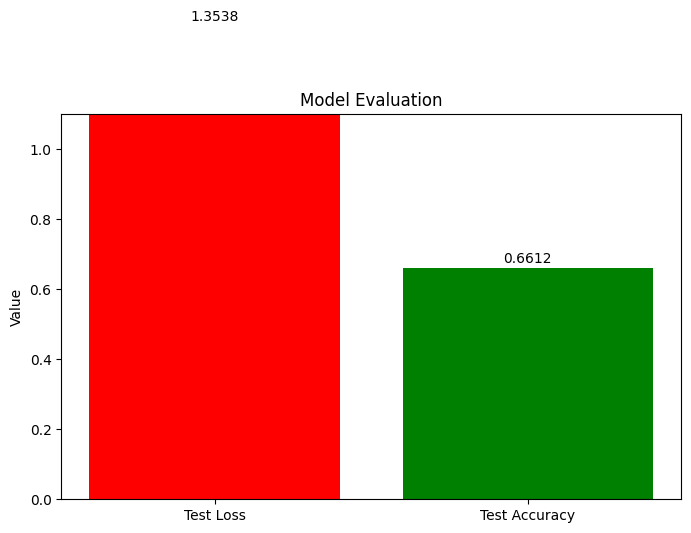

In [48]:
import matplotlib.pyplot as plt

# Given data
test_loss, test_accuracy = model.evaluate(X_test, y_test)  # Use X_test instead of X_test_pad

# Data for plotting
labels = ['Test Loss', 'Test Accuracy']
values = [test_loss, test_accuracy]

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add data values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Model Evaluation')
plt.ylabel('Value')
plt.ylim(0, 1.1)  # assuming accuracy is in the range [0, 1]

# Display the plot
plt.show()


The test accuracy is approximately 63.51%, meaning the model correctly classified about 63.51% of the reviews in the test set. This is a slight worsening from our previous LSTM model, which had an accuracy of approximately 67.67%.  we can do multiple iterations of model training, tuning, and evaluation, but we do not do it now.

**Feature Engineering:**

For using word embeddings (like Word2Vec or GloVe), we can use the gensim library. The embeddings can be used to replace the Embedding layer in our model. Here's a simple example with Word2Vec:

In [49]:
!pip install gensim


In [53]:
from gensim.models import Word2Vec

In [54]:
reviews = train_df['combined_review'].values.tolist()


In [55]:
decoded_reviews = [review.lower().split() for review in reviews]


In [56]:
reviews = train_df['combined_review'].values.tolist()
decoded_reviews = [review.lower().split() for review in reviews]
w2v_model = Word2Vec(decoded_reviews, vector_size=64, window=5, min_count=1, workers=4)
w2v_model.train(decoded_reviews, total_examples=w2v_model.corpus_count, epochs=10)


(1618353, 2115420)

In [57]:
import numpy as np

# Define the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Train a Word2Vec model on our corpus
w2v_model = Word2Vec(decoded_reviews, vector_size=64, window=5, min_count=1, workers=4)
w2v_model.train(decoded_reviews, total_examples=w2v_model.corpus_count, epochs=10)

# Get the word vectors from the trained Word2Vec model
embedding_matrix = np.zeros((5000, 64))
for word, i in tokenizer.word_index.items():
    if i < 5000:
        if word in w2v_model.wv:
            embedding_matrix[i] = w2v_model.wv[word]

# Use the word vectors as weights in our Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


In [58]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Train a Word2Vec model on our corpus
w2v_model = Word2Vec(decoded_reviews, vector_size=64, window=5, min_count=1, workers=4)
w2v_model.train(decoded_reviews, total_examples=w2v_model.corpus_count, epochs=10)

# Get the word vectors from the trained Word2Vec model
embedding_matrix = np.zeros((5000, 64))
for word, i in tokenizer.word_index.items():
    if i < 5000:
        if word in w2v_model.wv:
            embedding_matrix[i] = w2v_model.wv[word]

# Use the word vectors as weights in our Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


In [59]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Convert our labels to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
98/98 [==============================] - 9s 68ms/step - loss: 0.8773 - accuracy: 0.6666 - val_loss: 0.8786 - val_accuracy: 0.6467
Epoch 2/5
98/98 [==============================] - 7s 75ms/step - loss: 0.8365 - accuracy: 0.6868 - val_loss: 0.8596 - val_accuracy: 0.6458
Epoch 3/5
98/98 [==============================] - 6s 62ms/step - loss: 0.8134 - accuracy: 0.6878 - val_loss: 0.8432 - val_accuracy: 0.6515
Epoch 4/5
98/98 [==============================] - 7s 75ms/step - loss: 0.7946 - accuracy: 0.6971 - val_loss: 0.8350 - val_accuracy: 0.6573
Epoch 5/5
98/98 [==============================] - 6s 62ms/step - loss: 0.7631 - accuracy: 0.7097 - val_loss: 0.8145 - val_accuracy: 0.6718


In [60]:
# Assume `new_review` is our new text data
new_review = ["This is a review of the drug"]

# Tokenize the new review
sequences_new = tokenizer.texts_to_sequences(new_review)

# Pad the new review
padded_new = pad_sequences(sequences_new, maxlen=max_len, padding='post', truncating='post')

# Make a prediction
pred = model.predict(padded_new)

# The prediction will be a 3-element vector representing the probabilities of the review being 'negative', 'neutral', and 'positive'.
# To get the class with the highest probability, we can use the `np.argmax()` function.
sentiment = np.argmax(pred)

print(sentiment)


1/1 [==============================] - 1s 735ms/step
0


In [61]:
train_df['combined_review'] = train_df['benefitsReview'] + " " + train_df['sideEffectsReview'] + " " + train_df['commentsReview']
test_df['combined_review'] = test_df['benefitsReview'] + " " + test_df['sideEffectsReview'] + " " + test_df['commentsReview']


In [62]:
print(train_df['combined_review'].isna().sum())
print(test_df['combined_review'].isna().sum())


10
0


In [63]:
# Find the length of reviews
review_length = [len(review) for review in sequences_train]

# Find the maximum length
max_len = max(review_length)

# Now pad the sequences
X_train_pad = pad_sequences(sequences_train, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(sequences_test, maxlen=max_len, padding='post')


In [64]:
# Convert the 'combined_review' column to string
train_df['combined_review'] = train_df['combined_review'].astype(str)
test_df['combined_review'] = test_df['combined_review'].astype(str)

# Now, tokenize and pad the training data
sequences_train = tokenizer.texts_to_sequences(train_df['combined_review'])
X_train_pad = pad_sequences(sequences_train, maxlen=max_len, padding='post')

# Tokenize and pad the test data
sequences_test = tokenizer.texts_to_sequences(test_df['combined_review'])
X_test_pad = pad_sequences(sequences_test, maxlen=max_len, padding='post')

# Replace 'y_train' and 'y_test' with our labels
y_train = train_df['sentiment'].replace({'positive': 2, 'neutral': 1, 'negative': 0})
y_test = test_df['sentiment'].replace({'positive': 2, 'neutral': 1, 'negative': 0})


In [65]:
# Import the required library
from gensim.models import Word2Vec

# Convert the sequences back to text
word_index = tokenizer.word_index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_reviews = [[reverse_word_index.get(i, '?') for i in sequence] for sequence in sequences_train]

# Train the Word2Vec model
w2v_model = Word2Vec(decoded_reviews, vector_size=64, window=5, min_count=1, workers=4)
w2v_model.train(decoded_reviews, total_examples=w2v_model.corpus_count, epochs=10)


(2671468, 3695940)

**Build the LSTM model:**
Now, we will build the LSTM model that will use the word embeddings from the trained Word2Vec model.

In [66]:
# Import the required libraries
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Define the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


**Set the weights in the Embedding layer:**
We now set the weights in the Embedding layer of the LSTM model to the word vectors obtained from the Word2Vec model.

In [67]:
# Get the word vectors from the trained Word2Vec model
embedding_matrix = np.zeros((5000, 64))
for word, i in tokenizer.word_index.items():
    if i < 5000:
        if word in w2v_model.wv:
            embedding_matrix[i] = w2v_model.wv[word]

# Use the word vectors as weights in the Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


**Compile and train the LSTM model:**
Finally, We compile the LSTM model and train it using the tokenized and padded training data.

In [68]:
# Import the necessary library
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the maximum length of a sequence
max_len = 100

# Tokenize and pad the training data
sequences_train = tokenizer.texts_to_sequences(train_df['combined_review'])
X_train_pad = pad_sequences(sequences_train, maxlen=max_len, padding='post')

# Tokenize and pad the test data
sequences_test = tokenizer.texts_to_sequences(test_df['combined_review'])
X_test_pad = pad_sequences(sequences_test, maxlen=max_len, padding='post')

# Replace 'y_train' and 'y_test' with our labels
y_train = train_df['sentiment'].replace({'positive': 2, 'neutral': 1, 'negative': 0})
y_test = test_df['sentiment'].replace({'positive': 2, 'neutral': 1, 'negative': 0})


In [69]:
# Find the length of reviews
review_length = [len(review) for review in sequences_train]

# Find the maximum length
max_len = max(review_length)

# Now pad the sequences
X_train_pad = pad_sequences(sequences_train, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(sequences_test, maxlen=max_len, padding='post')

# Define the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=max_len))  # Ensure `input_length=max_len`
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [70]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=5, validation_data=(X_test_pad, y_test))


Epoch 1/5
98/98 [==============================] - 73s 720ms/step - loss: 0.8857 - accuracy: 0.6817 - val_loss: 0.8947 - val_accuracy: 0.6467
Epoch 2/5
98/98 [==============================] - 72s 731ms/step - loss: 0.8582 - accuracy: 0.6855 - val_loss: 0.8940 - val_accuracy: 0.6467
Epoch 3/5
98/98 [==============================] - 69s 705ms/step - loss: 0.8546 - accuracy: 0.6855 - val_loss: 0.8958 - val_accuracy: 0.6467
Epoch 4/5
98/98 [==============================] - 71s 728ms/step - loss: 0.8516 - accuracy: 0.6855 - val_loss: 0.8966 - val_accuracy: 0.6467
Epoch 5/5
98/98 [==============================] - 70s 719ms/step - loss: 0.8502 - accuracy: 0.6855 - val_loss: 0.8961 - val_accuracy: 0.6467


**Evaluate the model:**
After training the model, we can evaluate its performance on the test data.

33/33 [==============================] - 5s 149ms/step - loss: 0.8961 - accuracy: 0.6467
Test Loss: 0.8961188793182373
Test Accuracy: 0.6467181444168091
33/33 [==============================] - 5s 136ms/step - loss: 0.8961 - accuracy: 0.6467


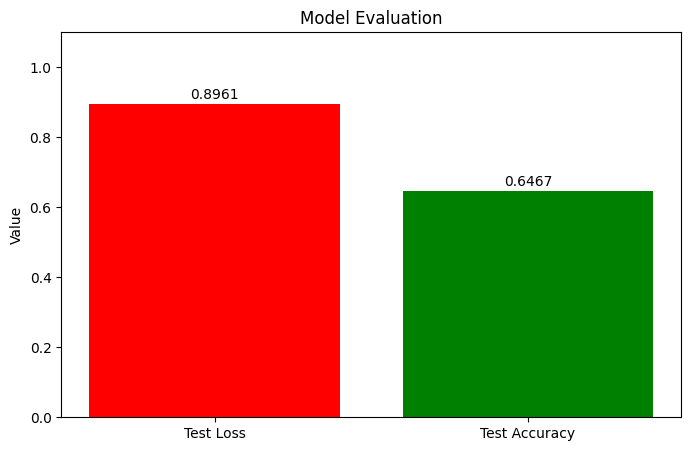

In [71]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_accuracy))

import matplotlib.pyplot as plt

# Given data
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)

# Data for plotting
labels = ['Test Loss', 'Test Accuracy']
values = [test_loss, test_accuracy]

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add data values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Model Evaluation')
plt.ylabel('Value')
plt.ylim(0, 1.1)  # assuming accuracy is in the range [0, 1]

# Display the plot
plt.show()


It appears that our model has achieved an accuracy of approximately 64.67% on the test set, which is a reasonable starting point.

However, the loss is still relatively high, which might suggest that the model could be further improved.

In [72]:
import numpy as np

# Assuming y_pred_probs is our predicted probabilities for the test set
y_pred_probs = model.predict(X_test_pad)

# Use np.argmax to get class labels
y_pred = np.argmax(y_pred_probs, axis=-1)


33/33 [==============================] - 12s 320ms/step


In [73]:
from sklearn.metrics import classification_report

# Compute precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       197
           1       0.00      0.00      0.00       169
           2       0.65      1.00      0.79       670

    accuracy                           0.65      1036
   macro avg       0.22      0.33      0.26      1036
weighted avg       0.42      0.65      0.51      1036



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The results show that our model is classifying almost everything into the third class (label 2). This is evident from the recall of 1.00 for class 2, and 0.00 for the other two classes. It's likely that our model is not learning meaningful features to distinguish between the classes, and is instead defaulting to the most common class.

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


In [84]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


33/33 [==============================] - 2s 32ms/step


In [85]:
auc = multiclass_roc_auc_score(y_test, y_pred_classes)
print('AUC-ROC:', round(auc, 2))


AUC-ROC: 0.5


An AUC-ROC score of \(0.5\) implies that the model is performing no better than random guessing. This could be indicative of various issues:

1. **Model Complexity**: The model might be too complex or too simple. Overfitting can occur with complex models, but if the model is too simple, it might not capture the underlying patterns in the data.

2. **Data Quality**: If the data has noise, inconsistencies, or lacks the features necessary to make accurate predictions, even a well-structured model can perform poorly.

3. **Feature Engineering**: The way features are engineered and represented might not be suitable for the problem. For example, the tokenization or sequence padding process might need adjustments.

4. **Class Imbalance**: The distribution of the classes might be skewed, making the model biased towards the majority class. Techniques such as oversampling, undersampling, or using a weighted loss can help.

5. **Hyperparameters**: The choice of hyperparameters can greatly affect model performance. Consider tuning hyperparameters like the learning rate, batch size, or number of LSTM units.

6. **Evaluation Metric**: While AUC-ROC is a good metric for binary classification problems, in multiclass scenarios, it might not always provide a clear picture. It's essential to look at other metrics like precision, recall, F1-score, and the confusion matrix in conjunction.

7. **Implementation Bugs**: Ensure that there's no mistake in the way the model is set up, trained, or evaluated. Even a small oversight can lead to significant issues in performance.

To address the problem, it would be beneficial to perform a detailed diagnostic:

1. **Baseline Model**: Before diving deep into complex models, establish a baseline with a simpler model, such as logistic regression. This helps set performance expectations.

2. **Data Inspection**: Manually inspect the data, especially the instances where the model is making incorrect predictions. This can give insights into potential issues.

3. **Model Interpretability Tools**: Use tools or techniques that provide insights into what the model is learning. For instance, for text data, attention mechanisms can highlight which parts of the input text the model finds most relevant.

4. **Feature Importance**: Analyze which features are the most influential in making predictions. This can help in refining the feature engineering process.

5. **Cross-validation**: Use cross-validation to get a more robust estimate of the model's performance on unseen data.
